### PRIMER PROYECTO DE ANÁLISIS DE DATOS CON PYTHON

In [1]:
# Importación de librerías
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
# Lectura del dataset
carpeta=r'C:/Users/USER/Documents/DATA-ANALYTICS-BRAYAN/PYTHON/Data-Visualization-Manipulation/proyect-data-analyst/'
archivo=r'players_22.csv'
dataset_fifa=pd.read_csv(carpeta+archivo,sep=',',low_memory=False)
dataset_fifa=dataset_fifa[["short_name","age","nationality_name","overall","potential","club_name","value_eur","wage_eur","player_positions"]]
dataset_fifa


,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,"RW, ST, CF"
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,"ST, LW"
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,"LW, CAM"
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,"CM, CAM"
...,...,...,...,...,...,...,...,...,...
19234,Song Defu,22,China PR,47,52,Wuhan FC,70000.0,1000.0,CDM
19235,C. Porter,19,Republic of Ireland,47,59,Derry City,110000.0,500.0,CM
19236,N. Logue,21,Republic of Ireland,47,55,Finn Harps,100000.0,500.0,CM
19237,L. Rudden,19,Republic of Ireland,47,60,Finn Harps,110000.0,500.0,ST


In [3]:
# Como en la columna "player_positions", existen mas de un dato por fila y separados por (,).
# Debemos separarlos en columnas cada dato y elegir una sola posición del jugador.
dataset_fifa["player_positions"]=dataset_fifa["player_positions"].str.split(',',expand=True)[0]
dataset_fifa.head()

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM


In [4]:
# Limpieza de datos Nulos y aplicando configuración al dataset origen.
dataset_fifa.dropna(inplace=True)
dataset_fifa.head()

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
2,Cristiano Ronaldo,36,Portugal,91,91,Manchester United,45000000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM


In [5]:
# Elección de jugadores que no estarán en el mundial.
players_missing_worldcup=["K. Benzema","S. Mané","S. Agüero","Sergio Ramos","P. Pogba",
                          "M. Reus","Diogo Jota","A. Harit","N. Kanté","G. Lo Celso","Piqué"]

eliminar_index=dataset_fifa[dataset_fifa["short_name"].isin(players_missing_worldcup)].index
dataset_fifa.drop(eliminar_index,axis=0,inplace=True)


In [6]:
# dataset_fifa[dataset_fifa["short_name"].isin(players_missing_worldcup)] #Verificamos que ya no estan los jugadores excluidos


In [7]:
# Filtrar países que jugaran en el mundial
teams_worldcup=[
    "Qatar","Brazil","Belgium","France","Argentina","England","Spain","Portugal",
    "Mexico","Netherlands","Denmark","Germany","Uruguay","Switzerland","United States","Croatia",
    "Senegal","Iran","Japan","Morocco","Serbia","Poland","South Korea","Tunisia",
    "Cameroon","Canada","Ecuador","Saudi Arabia","Ghana","Wales","Costa Rica","Australia"
]

dataset_fifa=dataset_fifa[dataset_fifa["nationality_name"].isin(teams_worldcup)]
dataset_fifa.sort_values(by=["overall","potential","value_eur"],ascending=False,inplace=True)
dataset_fifa.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_16892\1463805880.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_fifa.sort_values(by=["overall","potential","value_eur"],ascending=False,inplace=True)


,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
6,K. Mbappé,22,France,91,95,Paris Saint-Germain,194000000.0,230000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM


#### DISTRIBUCIÓN DE PUNTAJE DE JUGADORES

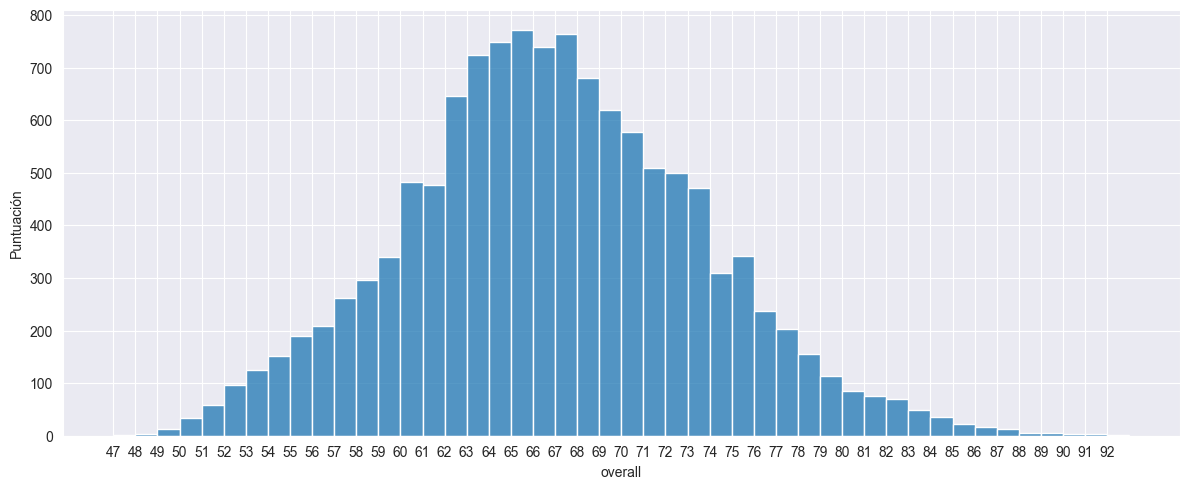

In [8]:
import numpy as np
fig,ax=plt.subplots(figsize=(12,5),tight_layout=True)

sns.histplot(dataset_fifa,x="overall",binwidth=1)
bins = np.arange(dataset_fifa["overall"].min(),dataset_fifa["overall"].max(),1)
plt.xticks(bins)
plt.ylabel("Puntuación")
plt.show()

#### MEJOR EQUIPO PARA EL MUNDIAL

In [9]:
# ELIMINAR VALORES REPETIDOS
dataset_fifa.drop_duplicates('player_positions')

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
0,L. Messi,34,Argentina,93,93,Paris Saint-Germain,78000000.0,320000.0,RW
1,R. Lewandowski,32,Poland,92,92,FC Bayern München,119500000.0,270000.0,ST
3,Neymar Jr,29,Brazil,91,91,Paris Saint-Germain,129000000.0,270000.0,LW
4,K. De Bruyne,30,Belgium,91,91,Manchester City,125500000.0,350000.0,CM
8,M. ter Stegen,29,Germany,90,92,FC Barcelona,99000000.0,250000.0,GK
19,J. Kimmich,26,Germany,89,90,FC Bayern München,108000000.0,160000.0,CDM
15,V. van Dijk,29,Netherlands,89,89,Liverpool,86000000.0,230000.0,CB
28,Bruno Fernandes,26,Portugal,88,89,Manchester United,107500000.0,250000.0,CAM
44,T. Alexander-Arnold,22,England,87,92,Liverpool,114000000.0,150000.0,RB
45,J. Sancho,21,England,87,91,Manchester United,116500000.0,150000.0,RM


In [10]:
dataset_best_player=dataset_fifa.copy()
dataset_best_player = dataset_best_player.drop_duplicates('nationality_name').reset_index(drop=True)

In [11]:

dataset_best_player["best_player_nationality"]=dataset_best_player["nationality_name"]+' - '+dataset_best_player["short_name"]
dataset_best_player["best_player_nationality"].head()

0       Argentina - L. Messi
1    Poland - R. Lewandowski
2         France - K. Mbappé
3         Brazil - Neymar Jr
4     Belgium - K. De Bruyne
Name: best_player_nationality, dtype: object

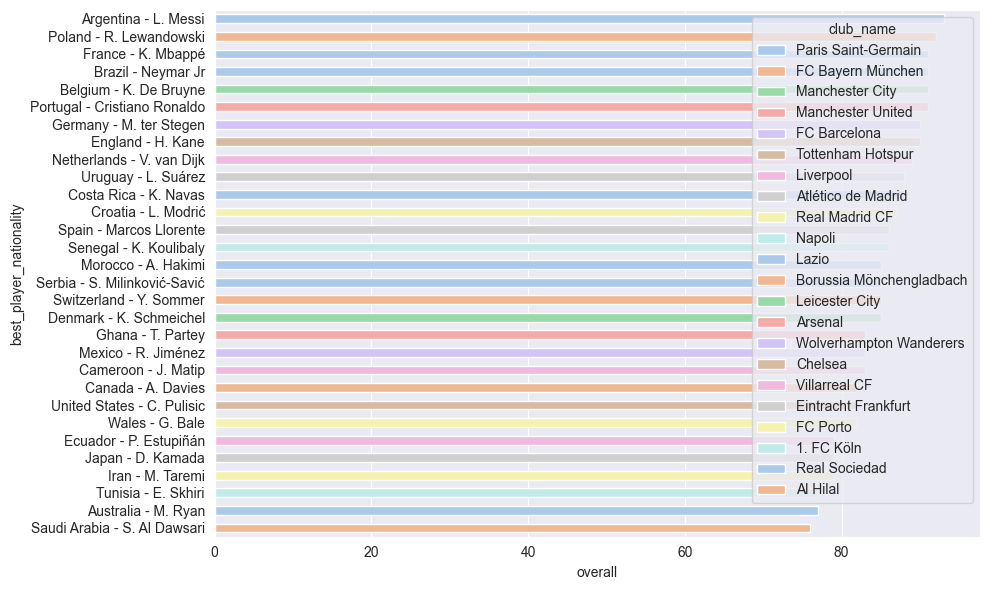

In [ ]:
# Gráfico de Barras Horizontal, mediante Seaborn
fig,ax=plt.subplots(figsize=(10,6),tight_layout=True)
sns.barplot(dataset_best_player,x='overall',y='best_player_nationality',hue="club_name",palette="pastel",width=0.5)
plt.show()

#### MEJOR PLANTILLA DE CADA PAÍS

In [13]:
def mejor_plantilla(nacionalidad):
    dataset_best_squad=dataset_fifa.copy()
    dataset_best_squad = dataset_best_squad.groupby(["nationality_name","player_positions"]).head(2)
    dataset_best_squad=dataset_best_squad[dataset_best_squad["nationality_name"]==nacionalidad].sort_values(by=['player_positions',"overall","potential"],ascending=False)
    return dataset_best_squad

In [14]:
mejor_plantilla("Brazil")

,short_name,age,nationality_name,overall,potential,club_name,value_eur,wage_eur,player_positions
191,Gabriel Jesus,24,Brazil,83,87,Manchester City,52500000.0,150000.0,ST
268,Richarlison,24,Brazil,82,87,Everton,46500000.0,100000.0,ST
5069,Paolinho Leima,21,Brazil,70,70,Clube Atlético Mineiro,1700000.0,12000.0,RWB
8031,Jadenilson Baia,33,Brazil,67,67,Sport Club Corinthians Paulista,525000.0,9000.0,RWB
662,Antony,21,Brazil,79,88,Ajax,39500000.0,17000.0,RW
656,Rodrygo,20,Brazil,79,88,Real Madrid CF,38500000.0,115000.0,RW
271,Raphinha,24,Brazil,82,87,Leeds United,46000000.0,89000.0,RM
318,Lucas Moura,28,Brazil,81,81,Tottenham Hotspur,26000000.0,105000.0,RM
311,Danilo,29,Brazil,81,81,Juventus,22500000.0,83000.0,RB
484,Maikel Catarino,25,Brazil,80,80,Sport Club Corinthians Paulista,21000000.0,33000.0,RB


#### MEJORES SELECCIONES POR CADA EQUIPO

In [15]:
promedio_puntuacion=[mejor_plantilla(team)["overall"].mean() for team in teams_worldcup]
df_promedio_puntiacion=pd.DataFrame({"Teams":teams_worldcup, "Average": promedio_puntuacion})
df_promedio_puntiacion.dropna(inplace=True)
df_promedio_puntiacion = df_promedio_puntiacion.sort_values("Average",ascending=False)
df_promedio_puntiacion.head()

,Teams,Average
6,Spain,82.400000
7,Portugal,81.733333
5,England,81.700000
1,Brazil,81.666667
3,France,81.000000


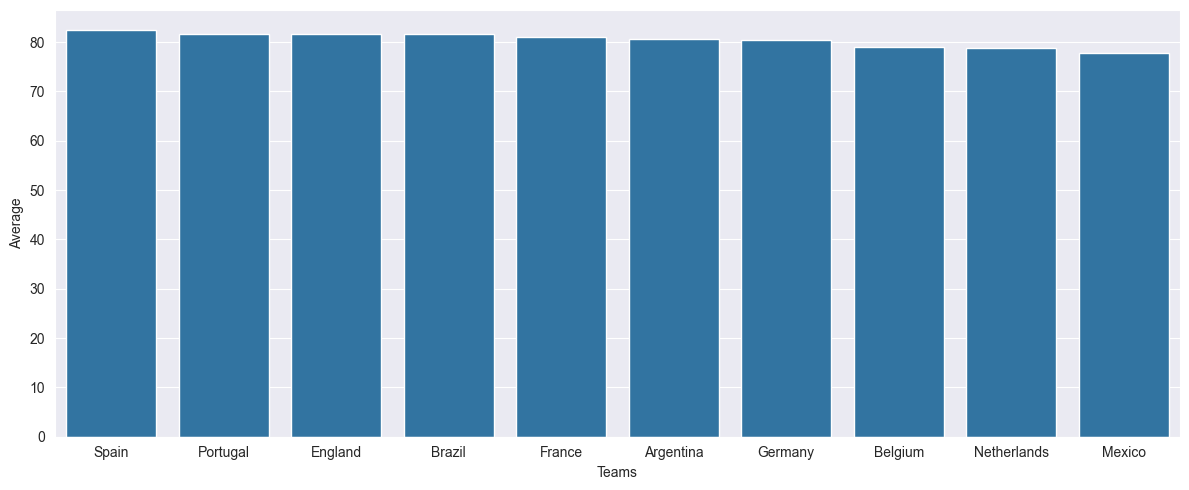

In [16]:
fig,ax=plt.subplots(figsize=(12,5),tight_layout=True)
sns.barplot(df_promedio_puntiacion[:10],x="Teams",y="Average")
plt.show()

In [17]:
# FORMACIONES DE EQUIPOS
dict_formation={
    "4-3-3":["GK","RB","CB","CB","CB","LB","CDM","CM","CAM","RW","ST","LW"],
    "4-4-2":["GK","RB","CB","CB","LB","RM","CM","CM","LM","ST","ST"],
    "4-2-3-1":["GK","RB","CB","CB","LB","CDM","CDM","CAM","CAM","CAM","ST"]
}

In [18]:
# FUNCIÓN QUE PERMITE HALLAR LOS JUGADORES BASADOS EN LA FORMACIÓN Y NACIONALIDAD
def best_lineup(nationality,lineup):
    lineup_count=[lineup.count(i) for i in lineup]
    
    df_lineup=pd.DataFrame({"position": lineup, 'count':lineup_count})
    positions_non_repetead=df_lineup[df_lineup['count']<=1]['position'].values
    positions_repeated=df_lineup[df_lineup['count']>1]['position'].values
    
    df_squad=mejor_plantilla(nacionalidad=nationality)
    df_lineup=pd.concat([
        df_squad[df_squad['player_positions'].isin(positions_non_repetead)].drop_duplicates('player_positions',keep='first'),
        df_squad[df_squad["player_positions"].isin(positions_repeated)]]
    )
    return df_lineup[["short_name","overall","club_name","player_positions"]]

In [25]:
best_lineup("Brazil",dict_formation["4-4-2"])

,short_name,overall,club_name,player_positions
271,Raphinha,82,Leeds United,RM
311,Danilo,81,Juventus,RB
465,Everton,80,SL Benfica,LM
153,Alex Sandro,83,Juventus,LB
18,Ederson,89,Manchester City,GK
191,Gabriel Jesus,83,Manchester City,ST
268,Richarlison,82,Everton,ST
190,Arthur,83,Juventus,CM
149,Paulinho,83,Al Ahli,CM
39,Marquinhos,87,Paris Saint-Germain,CB


In [20]:
for index,row in df_promedio_puntiacion[:9].iterrows():
    max_average=None
    for key,values in dict_formation.items():
        average=best_lineup(row["Teams"],values)["overall"].mean()
        if max_average is None or average>max_average:
            max_average=average
            formation=key
    print(row["Teams"],formation,max_average)

Spain 4-2-3-1 85.1
Portugal 4-2-3-1 84.9
England 4-4-2 84.45454545454545
Brazil 4-3-3 84.81818181818181
France 4-2-3-1 83.9
Argentina 4-3-3 83.54545454545455
Germany 4-2-3-1 84.1
Belgium 4-3-3 82.54545454545455
Netherlands 4-4-2 82.54545454545455
